In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#importing folium 
import folium
from folium.plugins import MiniMap

# <span style="color:black">**Folium Tutorial**</span> <img src="https://python-visualization.github.io/folium/latest/_images/folium_logo.png" alt="drawing" width="20"/>

## <span style="color:black">What is Folium </span>

**TL/DR;Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map**

- Library that combines data wrangling potential in Python and the mapping strengths of the Leaflet.js library
- Manipulate your data in Python  ➡️  visualize it in a Leaflet map via Folium
- What is Leaflet.js
   -  Open-source JavaScript library for mobile-friendly interactive maps
- What is JavaScript?
   - Scripting language that enhances web pages by allowing it to become more "interactive" and dynamic


In [21]:
map = folium.Map(location=(34.43027, -119.78804),zoom_start= 13)

kw = {
    "color": "blue",
    "line_cap": "round",
    "fill": True,
    "fill_color": "red",
    "weight": 1,
    "popup": "MEDS Daily Commute",
}

folium.Rectangle(
    bounds=[[34.41354, -119.86946], [34.41061, -119.68927], [34.44434, -119.76688],[34.3958, -119.71357]],
    line_join="mitter",
    dash_array="5, 5",
    **kw,
).add_to(map)

folium.CircleMarker(
    location=[34.41204, - 119.85606],
    radius=40,
    fill=True,
    popup=folium.Popup("IV Food Hot Spots"),
).add_to(map)

folium.Marker(
    location=[34.42279, -119.70187],
    popup=folium.Popup("NCEAS a.k.a 2nd Home"),
).add_to(map)

folium.CircleMarker(
    location=[34.41799, -119.85596],
    radius=40,
    fill=True,
    popup=folium.Popup("San Clemente"),
).add_to(map)

folium.Marker(
    location=[34.41816, -119.84986],
    popup=folium.Popup("Luna's Daily Swim"),
).add_to(map)

folium.Marker(
    location=[34.40980, -119.88088],
    popup=folium.Popup("Charlie's Surf Spot"),
).add_to(map)

folium.Marker(
    location=[34.41865, -119.69748],
    popup=folium.Popup("Our weekly Trivia Nights"),
).add_to(map)


MiniMap().add_to(map)

map 

## <span style="color:black">Where to find Folium:</span>


- [Github](https://github.com/python-visualization/folium) 
- [Webpage](https://python-visualization.github.io/folium/latest/index.html)

- [User Guide](https://python-visualization.github.io/folium/latest/user_guide.html)
- [Different Map Types](https://leaflet-extras.github.io/leaflet-providers/preview/)


## <span style="color:black">Who developed Folium? </span>
This package was developed by Rob Story, who has developed three other libraries, Folium being the most recent development.

## <span style="color:black">Why was Folium created? </span>
Folium was developed in order to enable easy data visualization with geospatial analysis. It helps make interactive geographic visualizations that can be shared as a website. Folium helps transform data in pandas into interactive Leaflet maps.

## <span style="color:black">Potential Use in Environmental Data Science </span>
Folium plays an important role in allowing the visualization of data. Examples of its usage are:


- Mapping carbon emissions across continents
- Earthquake data
- Map trajectories of airplane/flights
- Mapping air quality and pollutants
- Mapping hurricane paths
- Squirrel locations


Important Aesthetics: 

1. Features (Vector Layers)
- Circle: radius specified in meters (fixed position on map will not move)
- CircleMaker: radius specified in pixels
- PolyLine
- Rectangle
- Polygon
- ColorLine

2. Raster Layers
- Tiles
- ImageOverlay
- VideoOverlay 
- WmsTileLayer



## <span style="color:black">**Getting Started** </span>

Folium can be installed in the bash terminal by typing

`conda install folium -c conda-forge`

Or in your Powershell command line

`conda install forge`

## Tutorial Using Squirrel Dataset

In [22]:
squirrel_pop = squirrel_census = pd.read_csv('../data/2018_squirrel_data.csv', index_col=5, parse_dates=True)

/var/folders/m9/s28k539x2qlfhtjlf_610bqc0000gn/T/ipykernel_69758/3477734588.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  squirrel_pop = squirrel_census = pd.read_csv('../data/2018_squirrel_data.csv', index_col=5, parse_dates=True)


### Mapping Squirrels According to Fur Color 

#### Exploratory Data Analysis

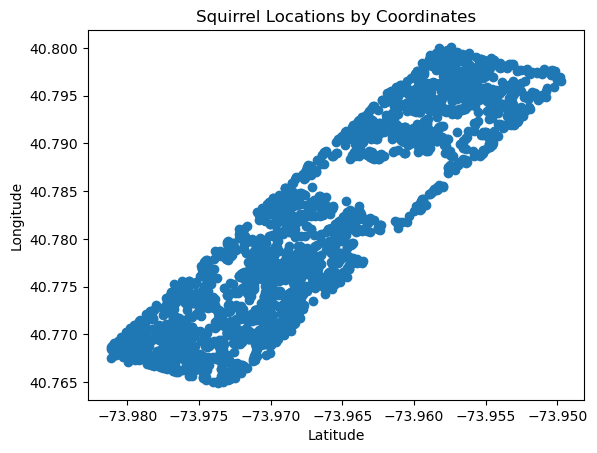

In [23]:
plt.scatter(squirrel_census.X, squirrel_census.Y)
plt.title("Squirrel Locations by Coordinates")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

### Making Better Visuals using Folium

In [24]:
import folium

# Create a map
map_1 = folium.Map(location=[40.781769, -73.966918], tiles='OpenStreetMap', zoom_start=14.25) # tiles = cartodb positron

# Get unique fur colors in the DataFrame
unique_fur_colors = squirrel_pop['Primary Fur Color'].unique()

# Define a color palette for each fur color (adjust as needed)
color_palette = {
    'Gray': '#808080',
    'Cinnamon': '#D27D2D',
    'Black': '#000000',
    'White': 'white',
    # Add more colors and fur color mappings as needed
}

# Iterate through unique fur colors and create map layers
for fur_color in unique_fur_colors:
    # Filter the DataFrame for the current fur color
    filtered_squirrels = squirrel_pop[squirrel_pop['Primary Fur Color'] == fur_color]

    # Create a map layer for the current fur color
    layer = folium.FeatureGroup(name=fur_color)

    # Add CircleMarkers for each squirrel of the current fur color
    for _, row in filtered_squirrels.iterrows():
        folium.CircleMarker(
            location=[row['Y'], row['X']],
            radius=5,
            color=color_palette.get(fur_color, 'White'),  # Default to white if color not found
            fill_color=(fur_color, 'red'),  # Default to white if color not found
            popup=f"Squirrel ID : {row['Unique Squirrel ID']}",
        ).add_to(layer)

    # Add the layer to the map
    layer.add_to(map_1)

# Add layer control for selecting fur colors
folium.LayerControl().add_to(map_1)

legendHtml = '''
     <div style="position: absolute; 
     top: 310px; left: 50px; width: 150px; height: 100px; 
     border:3px solid black; z-index:9999; font-size:14px;
     ">&nbsp; Squirrel Fur Color <br>
     &nbsp; <i class="fa fa-circle"
                  style="color:#808080"></i> &nbsp; Gray<br>
     &nbsp; <i class="fa fa-circle"
                  style="color:#D27D2D"></i> &nbsp; Cinnamon<br>
     &nbsp; <i class="fa fa-circle"
                  style="color:#000000"></i> &nbsp; Black<br>             
      </div>
     '''

# inject html corresponding to the legend into the map
map_1.get_root().html.add_child(folium.Element(legendHtml))

# Display the map
map_1
